#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 05
**CH05A What Likelihood of Loss to Expect on a Stock Portfolio?**

using the sp500 dataset

version 1.0 2021-05-05

In [ ]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from scipy import stats
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm

warnings.filterwarnings("ignore")


In [ ]:
sp500 = pd.read_csv("/workspaces/codespaces-jupyter/data/SP500_2006_16_data.csv")
sp500

,DATE,VALUE
0,2006-08-25,1295.09
1,2006-08-28,1301.78
2,2006-08-29,1304.28
3,2006-08-30,1304.27
4,2006-08-31,1303.82
...,...,...
2606,2016-08-22,2182.64
2607,2016-08-23,2186.90
2608,2016-08-24,2175.44
2609,2016-08-25,2172.47


In [ ]:
sp500 = sp500.replace("", np.nan).replace("#N/A", np.nan).dropna().reset_index(drop=True)

Create percent return

In [ ]:
#Fractional change between the current and a prior element. Examples below
sp500["pct_return"] = sp500["VALUE"].pct_change() * 100

In [ ]:
#Fractial change in action
s = pd.Series([90, 91, None, 85])
s.ffill().pct_change()

0         NaN
1    0.011111
2    0.000000
3   -0.065934
dtype: float64

Create date variables (we dont use these though)

In [ ]:
sp500["DATE"] = pd.to_datetime(sp500["DATE"], format="%Y-%m-%d")
sp500["year"] = sp500["DATE"].dt.year
sp500["month"] = sp500["DATE"].dt.month
sp500["yearmonth"] = sp500["year"] * 100 + sp500["month"]

In [ ]:
sp500

,DATE,VALUE,pct_return,year,month,yearmonth
0,2006-08-25,1295.09,NaN,2006,8,200608
1,2006-08-28,1301.78,0.516566,2006,8,200608
2,2006-08-29,1304.28,0.192045,2006,8,200608
3,2006-08-30,1304.27,-0.000767,2006,8,200608
4,2006-08-31,1303.82,-0.034502,2006,8,200608
...,...,...,...,...,...,...
2514,2016-08-22,2182.64,-0.056322,2016,8,201608
2515,2016-08-23,2186.90,0.195176,2016,8,201608
2516,2016-08-24,2175.44,-0.524029,2016,8,201608
2517,2016-08-25,2172.47,-0.136524,2016,8,201608


In [ ]:
sp500["pct_return"].describe()

count    2518.000000
mean        0.029145
std         1.315438
min        -9.034980
25%        -0.453734
50%         0.070897
75%         0.582782
max        11.580036
Name: pct_return, dtype: float64

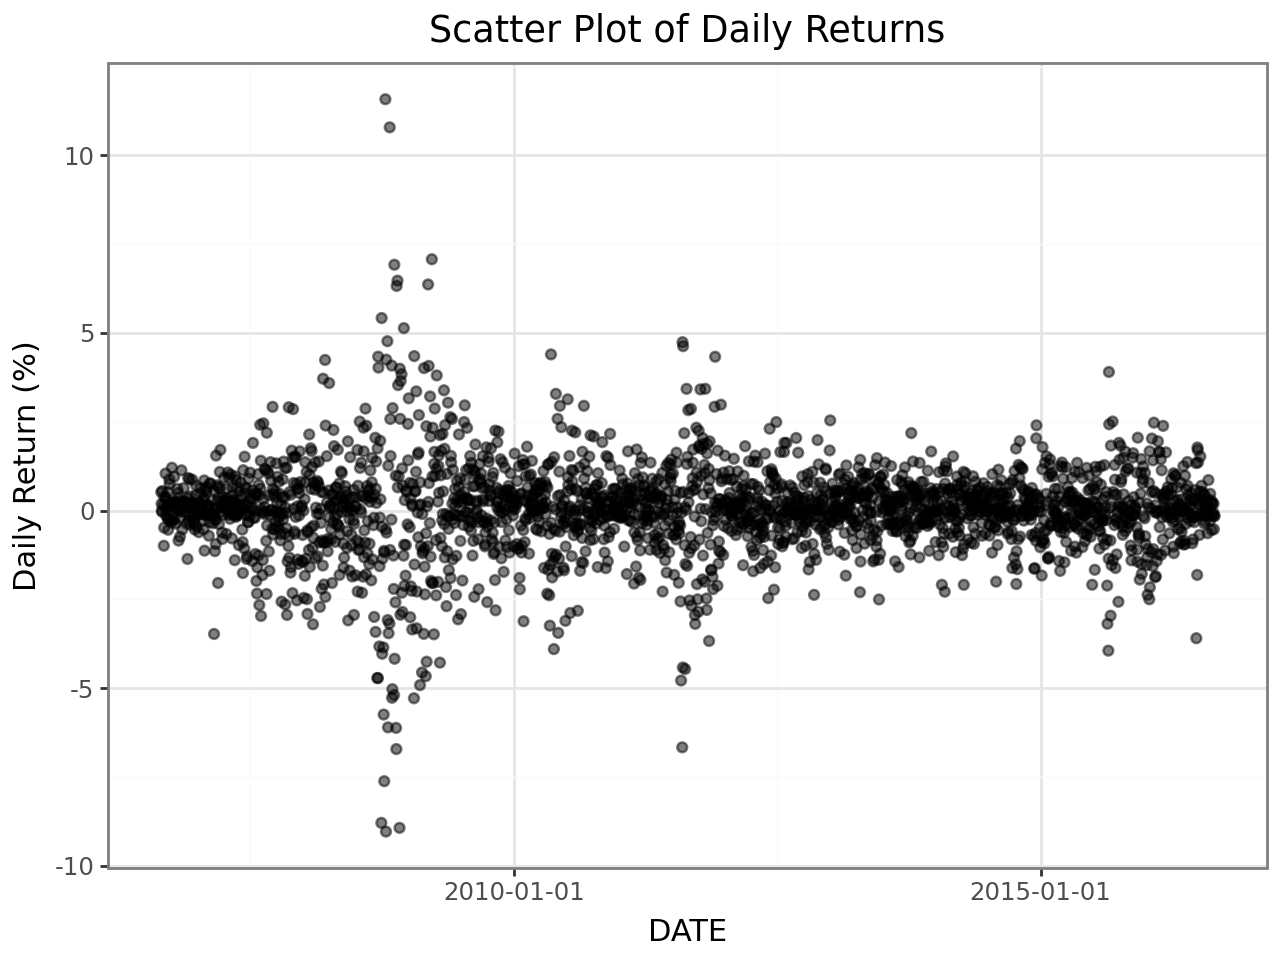

In [ ]:
(
    ggplot(sp500, aes(x="DATE", y="pct_return"))
    + geom_point(alpha=0.5)
    + labs(x="DATE", y="Daily Return (%)", title="Scatter Plot of Daily Returns")
    + theme_bw()
)


### Figure 5.1 Histogram of daily returns in the entire data

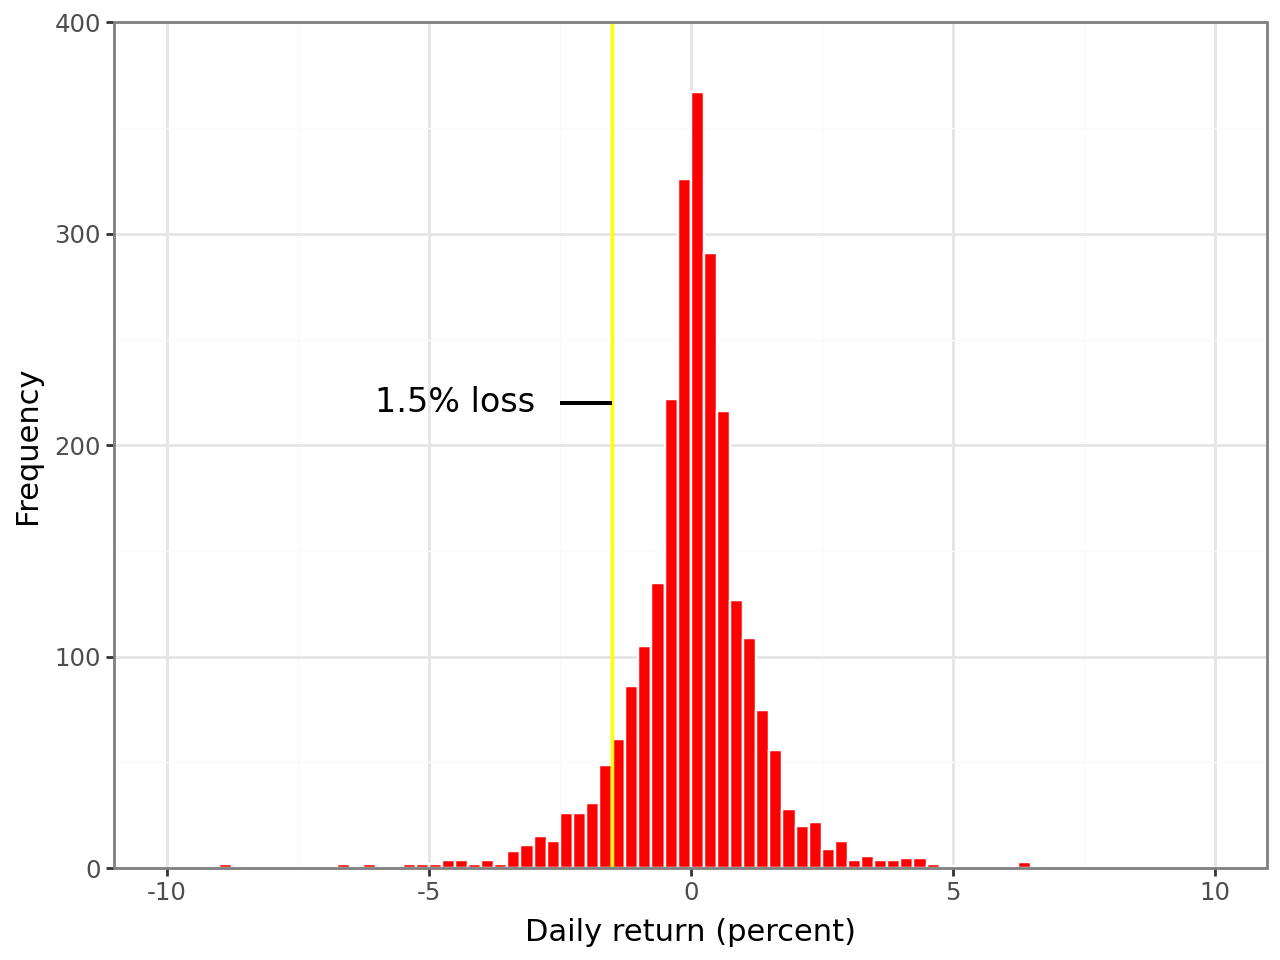

In [ ]:
(
    ggplot(sp500, aes("pct_return"))
    + geom_histogram(
        binwidth=0.25, color="white", fill="red", boundary=0, closed="left"
    )
    + geom_vline(xintercept=-1.5, size=0.7, color="yellow")
    + labs(x="Daily return (percent)", y="Frequency")
    + coord_cartesian(xlim=[-10, 10], ylim=[0, 400])
    + scale_y_continuous(expand=[0, 0])
    + geom_segment(aes(x=-2.5, y=220, xend=-1.5, yend=220))
    + annotate("text", x=-4.5, y=220, label="1.5% loss", size=12)
    + theme_bw()
)


In [ ]:
sp500["pct_return"].describe()

count    2518.000000
mean        0.029145
std         1.315438
min        -9.034980
25%        -0.453734
50%         0.070897
75%         0.582782
max        11.580036
Name: pct_return, dtype: float64

In [ ]:
sp500max=sp500.loc[sp500["pct_return"].idxmax()]
sp500max

DATE          2008-10-13 00:00:00
VALUE                     1003.35
pct_return              11.580036
year                         2008
month                          10
yearmonth                  200810
Name: 536, dtype: object

In [ ]:
sp500.count()
sp500
sp500less5 = sp500.loc[sp500["pct_return"] < -1.5].reset_index(drop=True)
sp500less5["pct_return_decimal"] = sp500less5["pct_return"] / 100
sp500less5

,DATE,VALUE,pct_return,year,month,yearmonth,pct_return_decimal
0,2007-02-27,1399.04,-3.472543,2007,2,200702,-0.034725
1,2007-03-13,1377.95,-2.036826,2007,3,200703,-0.020368
2,2007-06-07,1490.72,-1.756976,2007,6,200706,-0.017570
3,2007-07-24,1511.04,-1.980449,2007,7,200707,-0.019804
4,2007-07-26,1482.66,-2.333854,2007,7,200707,-0.023339
...,...,...,...,...,...,...,...
205,2016-01-25,1877.08,-1.563795,2016,1,201601,-0.015638
206,2016-02-02,1903.03,-1.874310,2016,2,201602,-0.018743
207,2016-02-05,1880.05,-1.848130,2016,2,201602,-0.018481
208,2016-06-24,2037.41,-3.591978,2016,6,201606,-0.035920


In [ ]:
sp500less5['DATE'].min(), sp500less5['DATE'].max()

(Timestamp('2007-02-27 00:00:00'), Timestamp('2016-06-27 00:00:00'))

In [ ]:
sp500less5["pct_return"].mean()

np.float64(-2.645619715165872)

In [ ]:
true_share = (sp500["pct_return"] <= -1.5).mean()
print(true_share)

0.0833664152441445


### Figure 5.2 prep

 Create 10 000 samples, with 500 and 1000 observations in each sample, taken from sp500["pct_return"]

In every sample: for each observation, check if it is a loss of 5% or more. Then calculate the percentage of observations out of 500 or 1000 where the loss exceeds 5%. 

In [ ]:
n_samples = 10000  # Define the number of samples

# For n=1000
samples_1000 = np.random.choice(sp500["pct_return"].dropna(), size=(n_samples, 1000), replace=True)
a=samples_1000 < -5

nobs_1000 = np.mean(samples_1000 < -1.5, axis=1)

# For n=500
samples_500 = np.random.choice(sp500["pct_return"].dropna(), size=(n_samples, 500), replace=True)
nobs_500 = np.mean(samples_500 < -1.5, axis=1)


In [ ]:
a = pd.DataFrame(a)
a

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
nobs_df = pd.DataFrame({"nobs_500": nobs_500, "nobs_1000": nobs_1000})*100

In [ ]:
a = pd.DataFrame(samples_1000).T
a

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.234897,0.712353,0.645634,0.508752,-0.095005,0.159753,-3.441147,-0.917522,1.152512,0.216377,...,-0.054574,-0.531622,1.006275,0.409432,0.404843,-0.104583,-0.002115,0.897959,-0.212098,-0.498714
1,-0.812593,-1.086346,-4.169913,-0.331787,0.404152,0.459980,0.218658,-0.055134,0.109443,-0.487598,...,1.219218,0.308450,-2.555675,-0.398861,-0.292385,0.608641,-0.930789,-0.217856,0.644236,-0.278581
2,-1.065784,-0.973388,-0.956155,0.981573,-0.998831,0.265587,0.015581,0.510676,0.230673,1.499375,...,-0.017564,0.073774,2.335604,0.511410,0.272807,0.496293,1.028707,-0.331787,-0.948677,-1.690846
3,0.305227,-0.377058,0.080025,1.370548,-1.192557,-0.064258,1.380637,1.492297,-0.339734,0.702847,...,1.669362,0.792802,1.786556,-0.053939,0.517229,-0.405528,1.431527,0.034524,-0.618808,-0.034842
4,0.156926,-1.266011,1.353365,0.196335,-2.311751,-0.938116,3.428485,0.285332,0.294077,0.908089,...,0.001562,-0.968545,-0.013246,1.207547,-0.780580,0.054920,-0.941132,-0.677136,2.269134,0.788571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.313454,-0.627998,-0.420321,0.375060,-1.428697,0.065879,-0.259450,1.041920,0.954109,-3.114064,...,0.261662,3.355760,0.972045,-9.034980,-0.341815,0.066946,-0.191871,0.877251,0.154995,1.380637
996,0.720392,0.868944,1.520980,1.813908,0.548304,-1.432772,0.187212,-0.838135,2.580395,-2.256416,...,0.018708,0.232928,1.092299,-1.556556,0.291396,-0.886191,-0.142108,-1.942277,4.334178,0.436192
997,-0.682931,0.116892,0.030958,-0.388354,0.635645,-2.794223,2.144427,1.965645,-0.735336,0.407601,...,0.127550,-1.172575,0.652672,1.030010,-3.114064,-0.041823,0.652441,0.217259,0.214991,0.526163
998,-0.243802,-1.120033,-0.043927,0.249502,-0.424219,-9.034980,0.322341,-1.968355,0.052987,0.015581,...,-1.693537,0.777019,0.230066,-0.047729,-0.941132,0.074950,1.905502,-0.549160,0.000000,0.798263


In [ ]:
nobs_df

,nobs_500,nobs_1000
0,9.0,9.2
1,10.2,8.9
2,8.0,9.5
3,9.0,7.5
4,8.2,9.2
...,...,...
9995,9.0,8.2
9996,7.2,7.8
9997,8.4,8.4
9998,8.0,9.0


In [ ]:
error = (
    norm.ppf(0.975) * np.std(nobs_df["nobs_1000"]) / np.sqrt(len(nobs_df["nobs_1000"]))
)
left = np.mean(nobs_df["nobs_1000"]) - error
right = np.mean(nobs_df["nobs_1000"]) + error


### Figure 5.2

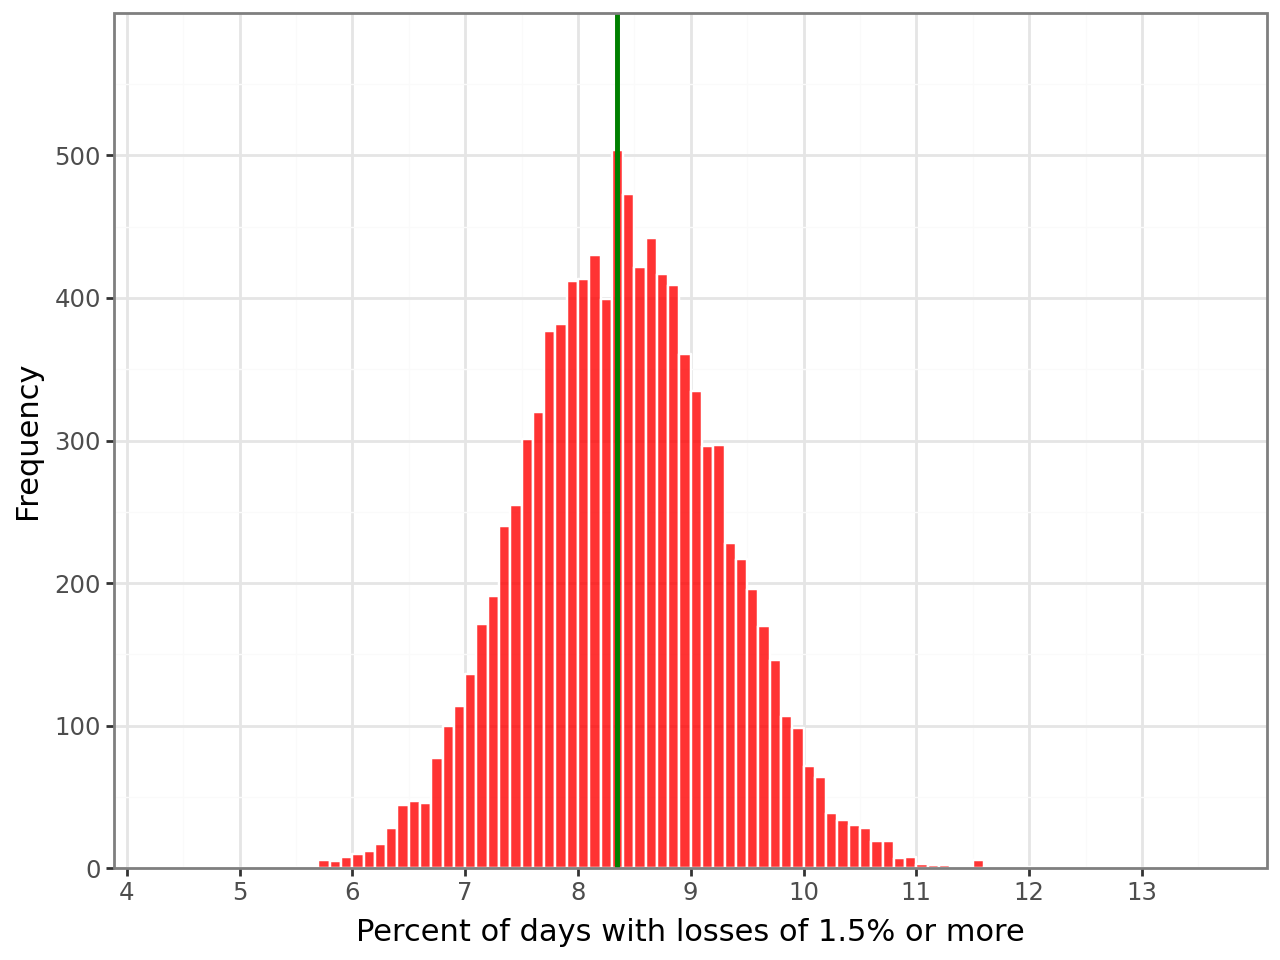

In [ ]:
(
    ggplot(nobs_df, aes("nobs_1000"))
    + geom_histogram(
        binwidth=0.1,
        color="white",
        fill="red",
        alpha=0.8,
        center=0.75,
        closed="left",
    )
    + labs(x="Percent of days with losses of 1.5% or more", y="Frequency")
    + geom_vline(aes(xintercept=nobs_df["nobs_1000"].mean()), color="green", size=1)
    + coord_cartesian(xlim=[4, 14], ylim=(0, 600))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4,14), breaks=np.arange(4, 14, 1))
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 600), breaks=np.arange(0, 600, 100)
    )
    + geom_segment(aes(x=0.8, y=2000, xend=0.52, yend=2000))
    + annotate("text", x=0.9, y=2000, label="Mean", size=12)
    + theme_bw()
)

In [ ]:
nobs_df["nobs_1000"].std()

np.float64(0.8717710128639785)

In [ ]:
nobs_df["nobs_500"].std()

np.float64(1.2271099329231867)

In [ ]:
nobs_df["nobs_1000"].mean()

np.float64(8.348859999999998)

In [ ]:
nobs_df["nobs_500"].mean()

np.float64(8.33382)

### Figure 5.3 

Not working with epanechnikov kernel

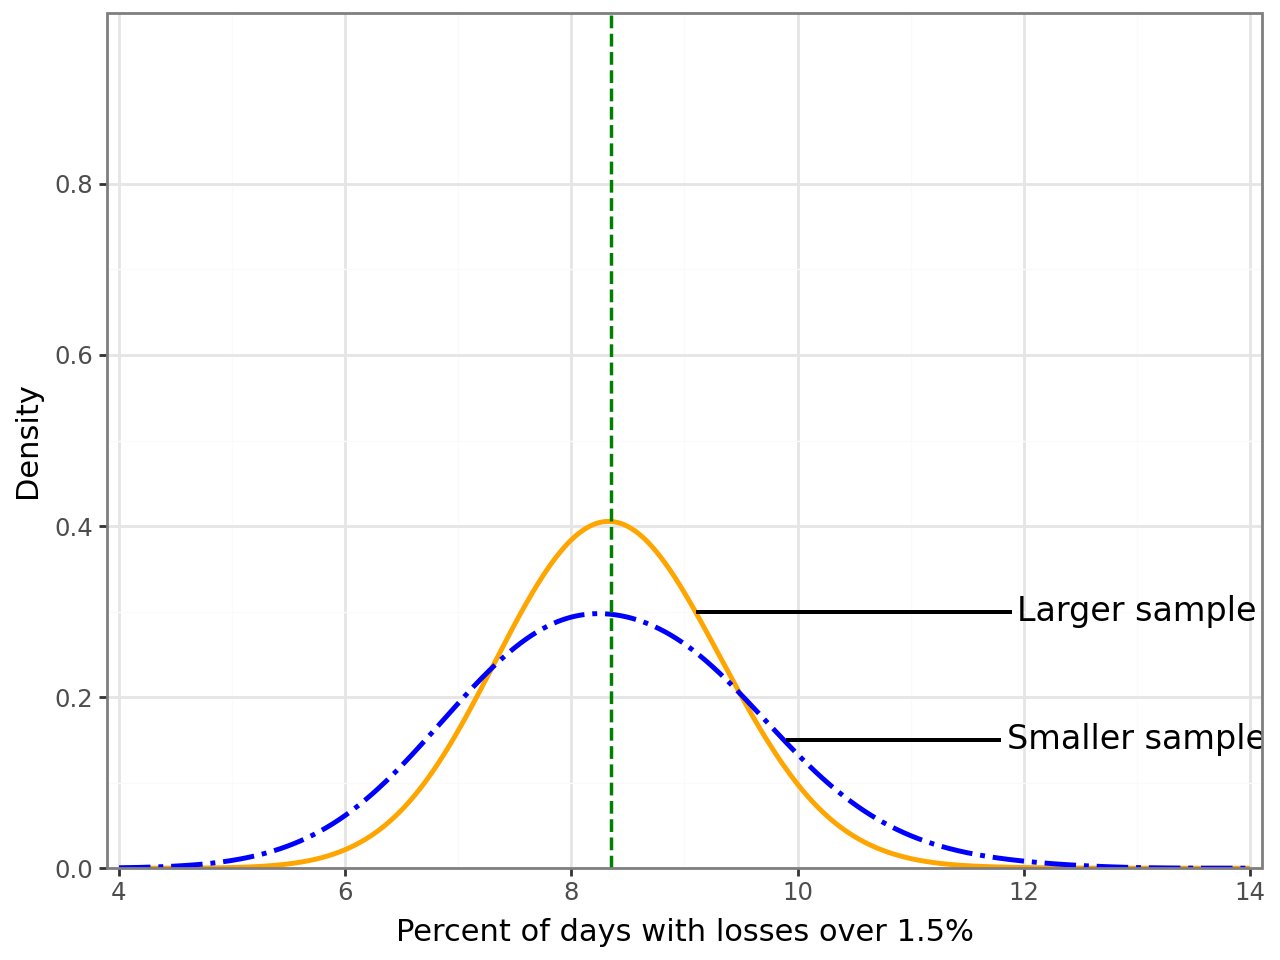

In [ ]:
(
    ggplot(nobs_df)
    + stat_density(aes(x="nobs_1000"), color="orange", geom="line", bw=0.45, size=1)
    + stat_density(aes(x="nobs_500"), color="blue", geom="line", bw=0.45, linetype="dashdot", size=1)
    + labs(x="Percent of days with losses over 1.5%", y="Density")
    + geom_vline(xintercept=nobs_df["nobs_1000"].mean(), color="green", size=0.7, linetype="dashed")
    + geom_segment(aes(x=11.9, y=0.3, xend=9.1, yend=0.3), size=0.5)
    + annotate("text", x=13, y=0.3, label="Larger sample", size=12)
    + geom_segment(aes(x=11.8, y=0.15, xend=9.9, yend=0.15), size=0.5)
    + annotate("text", x=13, y=0.15, label="Smaller sample", size=12)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 14), breaks=np.arange(4, 15, 2))
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 1), breaks=np.arange(0, 1, 0.2))
    + theme_bw()
    + theme(
        legend_position="none",
    )
)

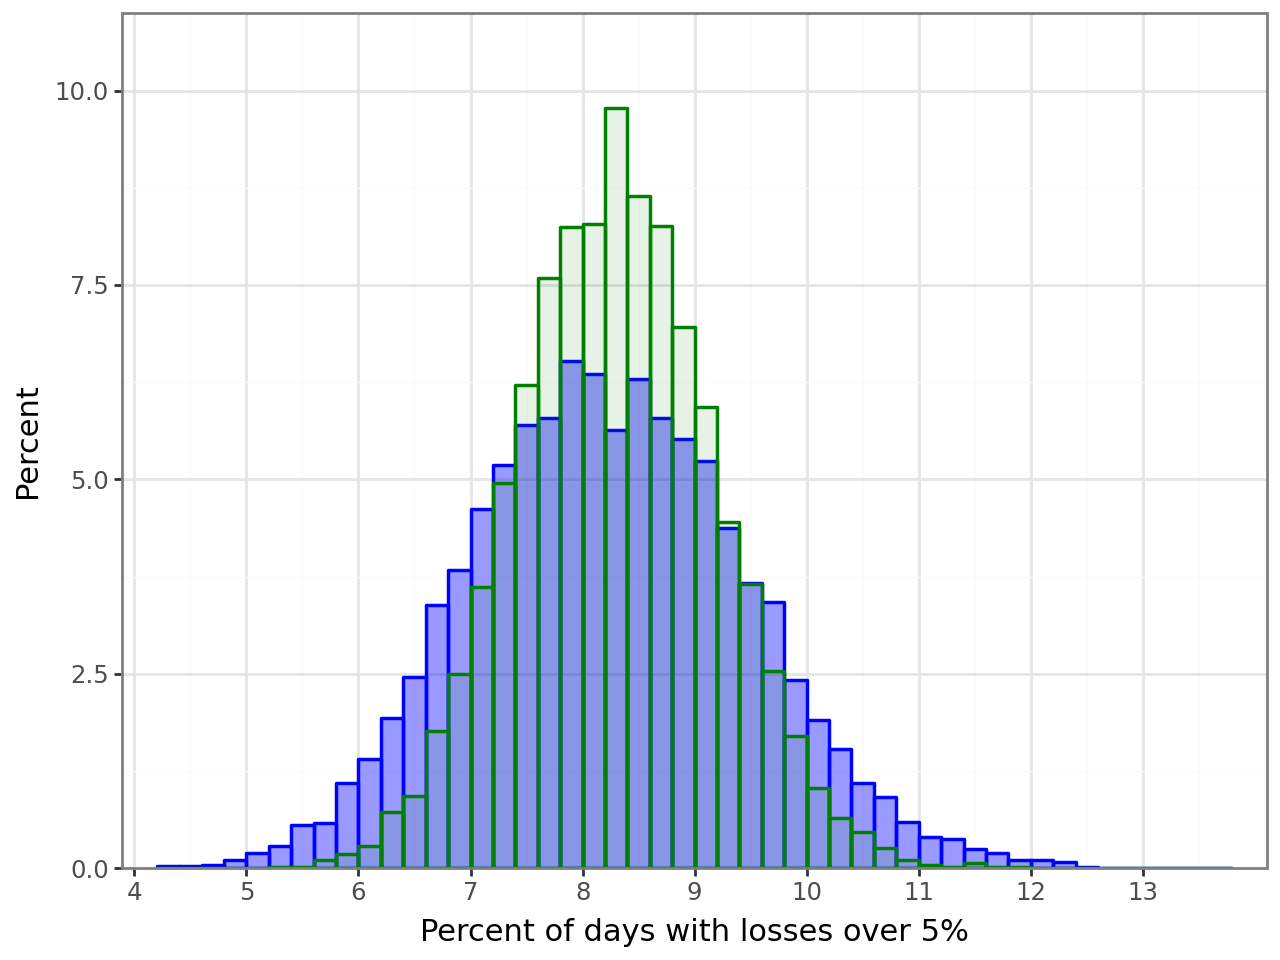

In [ ]:
(
    ggplot(nobs_df)
    + geom_histogram(
        aes(x="nobs_500", y="stat(count)/sum(stat(count))*100"),
        color="blue",
        fill="blue",
        binwidth=0.2,
        center=0.5,
        size=0.7,
        alpha=0.4,
        closed="left",
    )
    + geom_histogram(
        aes(x="nobs_1000", y="stat(count)/sum(stat(count))*100"),
        color="green",
        fill="green",
        binwidth=0.2,
        center=0.5,
        alpha=0.1,
        size=0.7,
        closed="left",
    )
    + ylab("Percent")
    + xlab("Percent of days with losses over 1.5%")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(4, 14), breaks=np.arange(0, 14, 1)
    )
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 11))
    + scale_color_manual(
        labels=("N = 1000", "N = 500"), name="", values=("blue", "green")
    )
    + scale_alpha_identity()
    + scale_fill_identity()
    + theme_bw()
    + theme(
        legend_direction="horizontal",
    )
)


Create bootstrap samples

In [ ]:
bootstrap_samples = np.random.choice(
    sp500["pct_return"].dropna(),
    size=(10000, len(sp500["pct_return"].dropna())),
    replace=True
)

In [ ]:
pd.DataFrame(bootstrap_samples).T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-0.657282,0.573751,1.097604,0.115847,-2.852409,-1.372359,-2.914451,0.368304,0.043958,-0.227162,...,-0.017564,-1.134834,0.378665,-0.193212,0.048633,-2.817869,0.354194,1.311750,-1.028193,0.718905
1,1.033782,-0.274775,0.572140,-0.377058,0.696568,-0.190007,-0.365553,2.052576,-0.384632,0.062083,...,2.580395,-0.924789,-1.353204,-0.064343,-0.252216,-2.497415,0.788064,0.354723,1.360408,-0.607469
2,1.708044,-1.141295,-0.105162,0.127550,0.432510,0.242597,2.456653,0.503299,0.018708,1.407182,...,-1.253726,-0.388354,1.662754,-0.042382,1.141657,-0.054408,-0.447365,-0.297074,0.464427,-0.023889
3,-1.962544,0.173855,4.025661,0.340861,0.901272,-0.368717,0.803568,4.334178,-1.897114,-0.071308,...,-1.854293,-2.426077,-0.330460,0.647245,0.505239,0.765192,1.075128,-0.840215,-0.657321,1.153139
4,-0.032584,0.019024,-1.012887,-0.281678,-0.150159,1.342758,-0.038473,1.070708,0.422095,0.020516,...,-0.834122,0.391189,-0.955717,0.304995,-0.129827,-0.175270,1.081794,-0.431675,0.923515,-0.413540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,-1.954091,-6.663443,1.928278,-1.665273,1.339826,0.652441,2.909296,-0.171769,-1.171730,-0.654496,...,0.354116,-0.127514,0.959050,-1.120740,1.053462,0.513393,-0.137885,0.475422,-0.036442,-1.311542
2514,0.717441,1.364461,-0.415864,-0.522652,0.764405,0.072291,-0.216555,-0.557844,-0.374038,-0.002901,...,-0.273979,0.805832,-0.282980,-1.820361,0.235424,0.558421,0.614069,-0.048897,-0.868602,0.368376
2515,-0.365217,0.647245,0.279298,0.110947,0.148515,0.501575,-0.071013,0.215820,0.119616,0.175445,...,1.630868,-1.949496,0.325817,0.668386,-0.091801,-1.811375,-0.547908,0.354431,-0.702321,2.401522
2516,-2.278472,2.144220,0.466163,-1.192557,1.356500,0.588902,0.892278,0.242597,0.154995,0.162968,...,2.909296,-5.739481,-0.183696,-0.706931,-0.116182,0.397388,0.208267,0.298184,-0.147879,-0.825496


Calculate percent of days wit losses over  thresholds from -1 to 10

In [ ]:
bootstrap_loss_results_1_5 = pd.DataFrame(
    [
        np.mean(bootstrap_samples < -pct_loss, axis=1) * 100
        for pct_loss in np.arange(1.5, 11, 1)
    ],
    index=[f"loss{pct_loss}" for pct_loss in np.arange(1.5, 11, 1)],
).T

In [ ]:
bootstrap_loss_results_1_5

,loss1.5,loss2.5,loss3.5,loss4.5,loss5.5,loss6.5,loss7.5,loss8.5,loss9.5,loss10.5
0,8.776807,3.772836,1.350278,1.072280,0.397141,0.238284,0.238284,0.198570,0.0,0.0
1,7.942812,2.978554,1.151708,0.754567,0.516283,0.397141,0.238284,0.198570,0.0,0.0
2,7.982526,3.177125,1.151708,0.913423,0.476569,0.397141,0.198570,0.079428,0.0,0.0
3,7.505957,2.621128,0.992851,0.675139,0.397141,0.238284,0.158856,0.079428,0.0,0.0
4,7.942812,2.581414,0.754567,0.516283,0.317712,0.079428,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,8.181096,3.375695,1.111994,0.754567,0.397141,0.277998,0.198570,0.119142,0.0,0.0
9996,7.545671,2.978554,0.873709,0.635425,0.397141,0.198570,0.158856,0.079428,0.0,0.0
9997,7.903098,3.256553,1.429706,0.714853,0.436855,0.317712,0.238284,0.158856,0.0,0.0
9998,8.022240,2.700556,1.350278,0.873709,0.397141,0.198570,0.119142,0.039714,0.0,0.0


Plot percent of days with losses over -5%

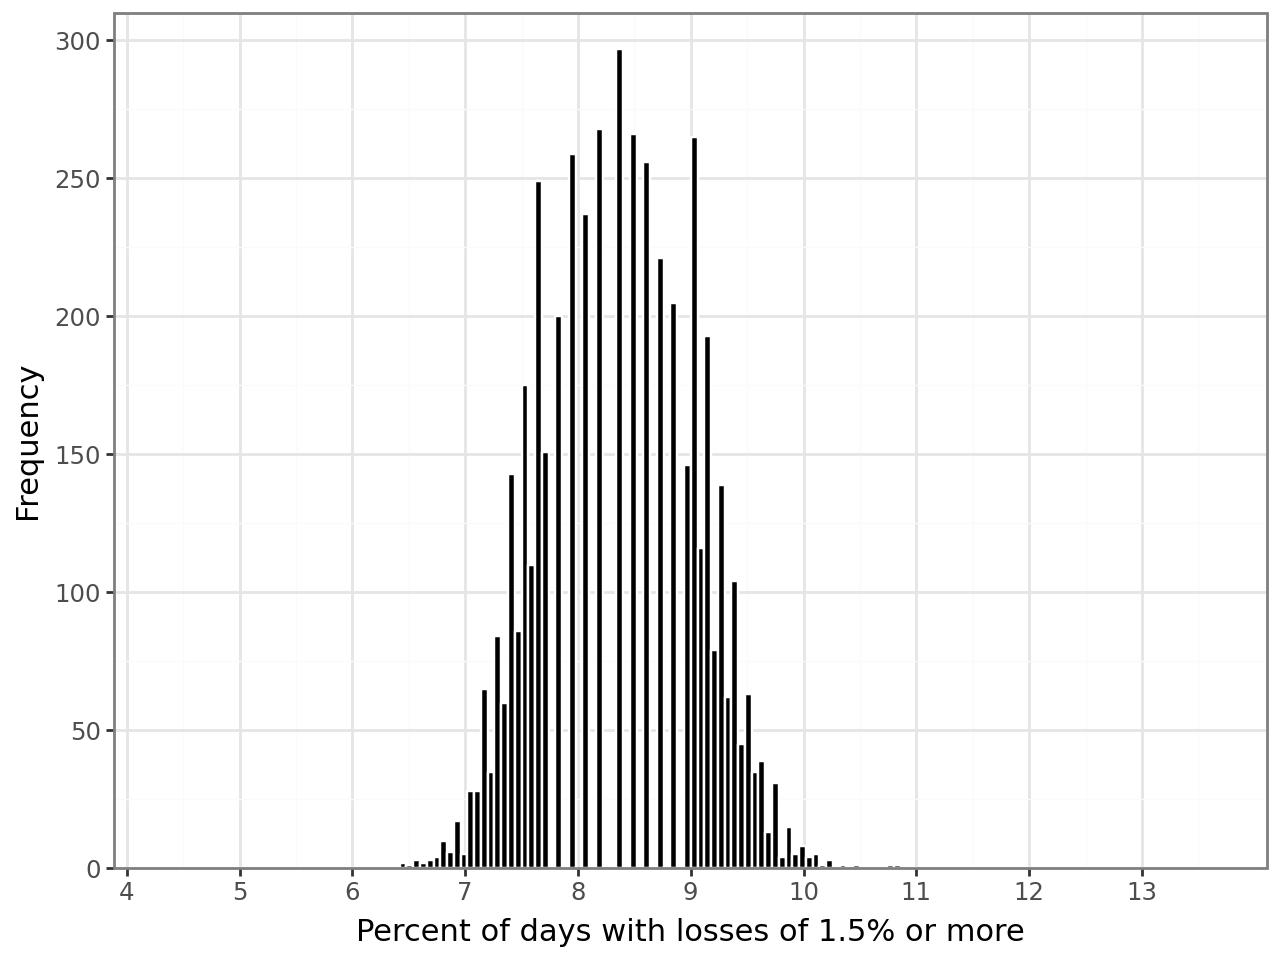

In [ ]:
(
    ggplot(bootstrap_loss_results_1_5, aes("loss1.5"))
    + geom_histogram(
        fill="black", color="white", binwidth=0.06, boundary=0, closed="left"
    )
    + scale_y_continuous(expand=(0, 0), limits=(0, 310), breaks=np.arange(0, 310, 50))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 14), breaks=np.arange(4, 14, 1))
    + labs(x="Percent of days with losses of 1.5% or more", y="Frequency")
    + theme_bw()
)


In [ ]:
bootstrap_loss_results_1_5["loss1.5"].std()

np.float64(0.14468021089432884)

In [ ]:
mean_loss15 = bootstrap_loss_results_1_5["loss1.5"].mean()
se_bootstrap = bootstrap_loss_results_1_5["loss1.5"].std()
ci_lower_se = mean_loss5 - 2 * se_bootstrap
ci_upper_se = mean_loss5 + 2 * se_bootstrap

print(f"Approximate 95% CI using SE*2: [{ci_lower_se:.4f}, {ci_upper_se:.4f}]")

Approximate 95% CI using SE*2: [-0.5897, 1.6256]


In [ ]:
# Assuming bootstrap_loss_results["loss5"] is a Series of bootstrap results
ci_lower = bootstrap_loss_results["loss5"].quantile(0.025)
ci_upper = bootstrap_loss_results["loss5"].quantile(0.975)

print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


95% Confidence Interval: [0.2780, 0.7943]


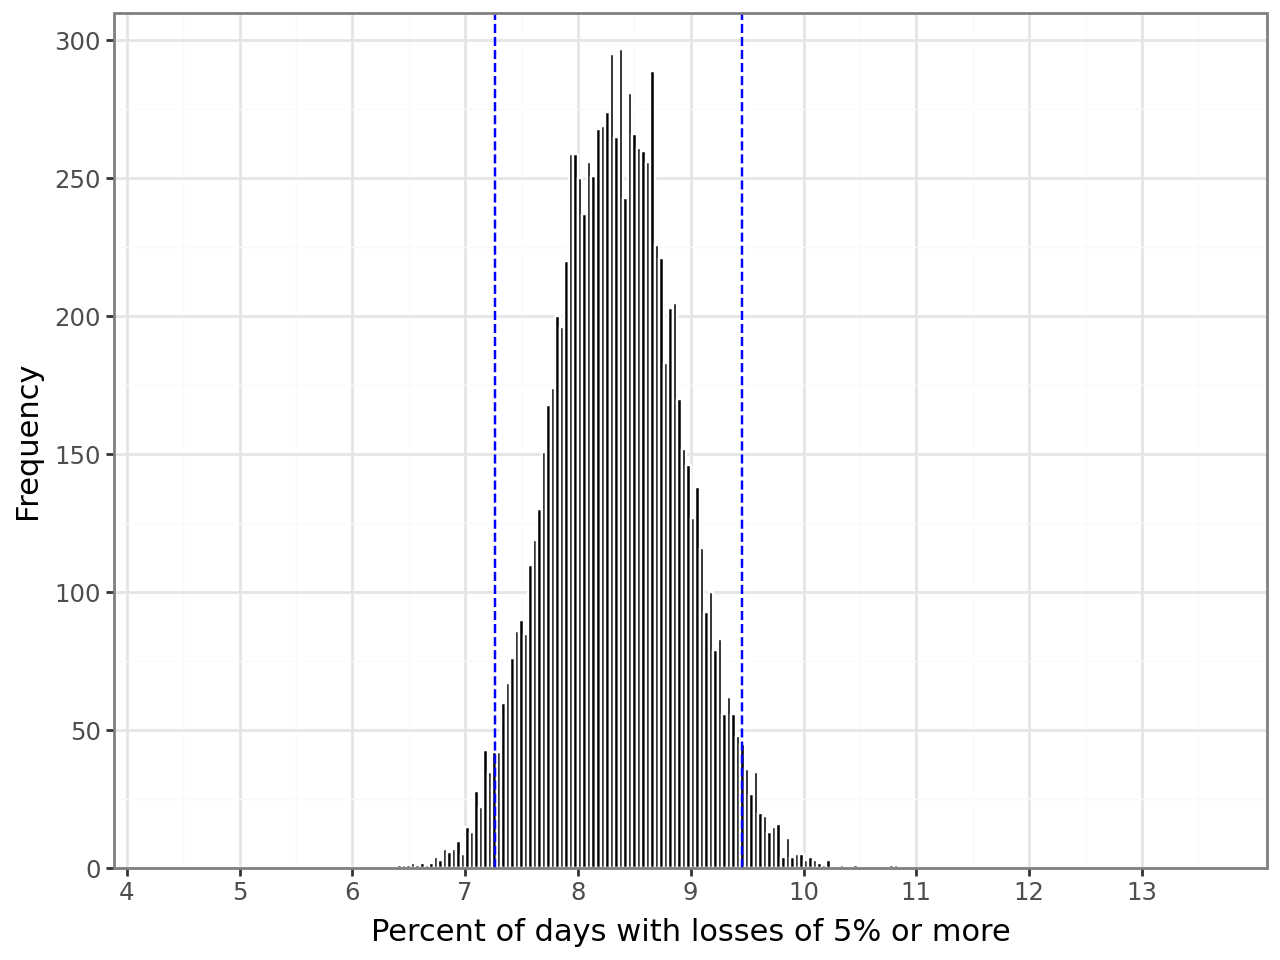

In [ ]:
from plotnine import geom_vline, annotate

ci_lower = bootstrap_loss_results_1_5["loss1.5"].quantile(0.025)
ci_upper = bootstrap_loss_results_1_5["loss1.5"].quantile(0.975)

(
    ggplot(bootstrap_loss_results_1_5, aes("loss1.5"))
    + geom_histogram(
        fill="black", color="white", binwidth=0.04, boundary=0, closed="left"
    )
    + geom_vline(xintercept=ci_lower, color="blue", linetype="dashed")
    + geom_vline(xintercept=ci_upper, color="blue", linetype="dashed")
    + annotate("text", x=ci_lower + 0.02, y=1150, label=f"2.5% = {ci_lower:.2f}", size=10)
    + annotate("text", x=ci_upper - 0.06, y=1150, label=f"97.5% = {ci_upper:.2f}", size=10)
    + scale_y_continuous(expand=(0, 0), limits=(0, 310), breaks=np.arange(0, 310, 50))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 14), breaks=np.arange(4, 14, 1))
    + labs(x="Percent of days with losses of 5% or more", y="Frequency")
    + theme_bw()
)


## Standard Error

In [ ]:
sp500.count()

DATE          2519
VALUE         2519
pct_return    2518
year          2519
month         2519
yearmonth     2519
dtype: int64

In [ ]:
ncov = round(1 / np.sqrt(sp500.count()),2)
ncov

DATE          0.02
VALUE         0.02
pct_return    0.02
year          0.02
month         0.02
yearmonth     0.02
dtype: float64

In [ ]:
# Calculate the indicator for loss > 5%
loss_indicator = (sp500["pct_return"] <= -5).dropna()
std_loss5 = loss_indicator.std(ddof=1)
print(f"Standard deviation of loss5 indicator: {std_loss5:.4f}")


Standard deviation of loss5 indicator: 0.0717


In [ ]:
SE=std_loss5 *ncov
SE=SE*100
SE

DATE          0.143334
VALUE         0.143334
pct_return    0.143334
year          0.143334
month         0.143334
yearmonth     0.143334
dtype: float64

### Compare with we got from bootstrap

In [ ]:
std_loss5 = bootstrap_loss_results_1_5["loss1.5"].std()
print(f"Standard deviation of fraction of 1.5%+ loss: {std_loss5}")

Standard deviation of fraction of 5%+ loss: 0.5538254280072883


### And just to calc a Confidence Interval for original dataset sp500

In [ ]:
from scipy.stats import norm

mean_loss5_or = loss_indicator.mean()
std_loss5_or = loss_indicator.std(ddof=1)
n = loss_indicator.count()
se = std_loss5_or / np.sqrt(n)
z = norm.ppf(0.975)  # 1.96 for 95% CI

ci_lower =round((mean_loss5_or - z * se)*100,1)
ci_upper =round((mean_loss5_or + z * se)*100,1)

print(f"95% Confidence Interval: [{ci_lower:.1f}, {ci_upper:.1f}]")


95% Confidence Interval: [0.2, 0.8]


In [ ]:
std_loss5.std()

np.float64(0.0)

## t_statistics

In [ ]:
# calc mean
mean=-round(sp500["pct"].mean(),3)
mean

In [ ]:
sp500

,DATE,VALUE,pct_return,year,month,yearmonth
0,2006-08-25,1295.09,NaN,2006,8,200608
1,2006-08-28,1301.78,0.516566,2006,8,200608
2,2006-08-29,1304.28,0.192045,2006,8,200608
3,2006-08-30,1304.27,-0.000767,2006,8,200608
4,2006-08-31,1303.82,-0.034502,2006,8,200608
...,...,...,...,...,...,...
2514,2016-08-22,2182.64,-0.056322,2016,8,201608
2515,2016-08-23,2186.90,0.195176,2016,8,201608
2516,2016-08-24,2175.44,-0.524029,2016,8,201608
2517,2016-08-25,2172.47,-0.136524,2016,8,201608
